In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split



> Note:
  *   train_data = x_train
  *   train_labels = y_train
  *   eval_data = x_test
  *   eval_labels = y_test
  *   train = x, labels = y

        
        





In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Training data:', x_train.shape, y_train.shape)
print('Test data:', x_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print('Reshaped training data:', x_train.shape)
print('Reshaped test data:', x_test.shape)

Reshaped training data: (60000, 28, 28, 1)
Reshaped test data: (10000, 28, 28, 1)


In [ ]:
# Normalizing the Dataset

x_train = x_train / np.float32(255.0)
x_test = x_test / np.float32(255.0)


# for labels, a binary vector length, 10 classes
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


print('Original label:', y_train[0])
print('After convertion to one-hot:', y_train_cat[0])
# # for dimension, an appr form by CNN (batch_size, height, width, channels)
# x_train = np.expand_dims(x_train, axis=-1)
# x_test = np.expand_dims(x_test, axis=-1)

Original label: 9
After convertion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# to split the data into train and test:

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train_cat, test_size = 0.2, random_state = 13)


In [ ]:
print('The train data:', x_train.shape, y_train.shape)
print('The test data:', x_test.shape, y_test.shape)
print('The valid data:', x_valid.shape, y_valid.shape)

The train data: (48000, 28, 28, 1) (48000, 10)
The test data: (10000, 28, 28, 1) (10000,)
The valid data: (12000, 28, 28, 1) (12000, 10)


In [ ]:
print('Fashion MNIST train - rows:', x_train.shape[0], 'columns:', x_train.shape[1:4])
print('Fashion MNIST test - rows:', x_test.shape[0], 'columns:', x_test.shape[1:4])

Fashion MNIST train - rows: 48000 columns: (28, 28, 1)
Fashion MNIST test - rows: 10000 columns: (28, 28, 1)


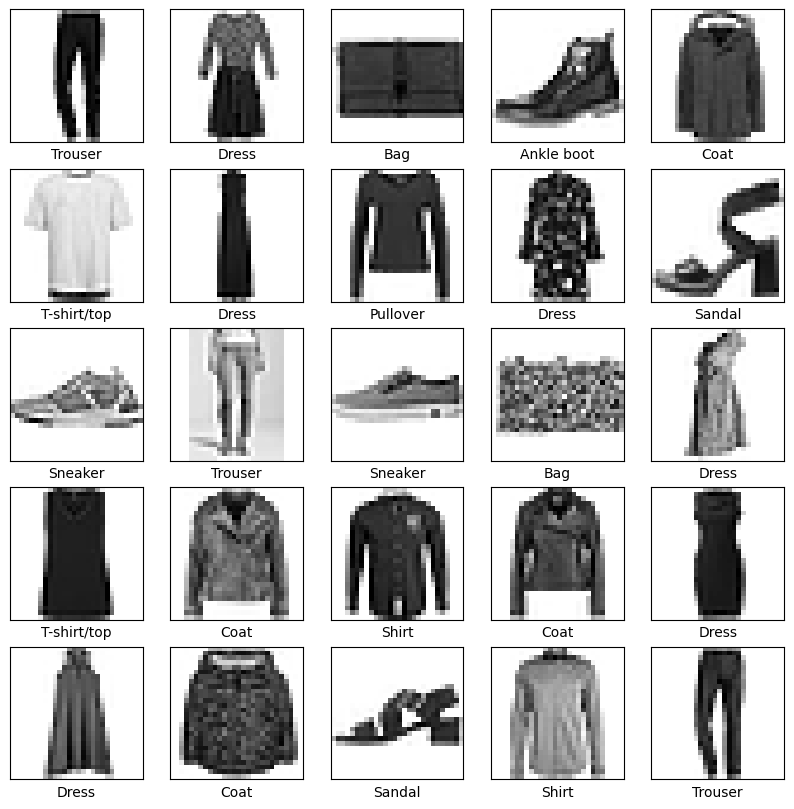

In [ ]:
# to check the data:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10,10))
for i in range(25):
  class_index = np.argmax(y_train[i])
  # to use y_train as index in class_names
  # as y_train[i] is a one-hot encoded array, not a valid value of class_names

  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[class_index])

plt.show()

In [ ]:
fashion_model = keras.Sequential()
fashion_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape=(28,28,1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(10, activation = 'softmax'))

In [ ]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [ ]:
fashion_model.compile(loss = keras.losses.categorical_crossentropy,
                      optimizer = keras.optimizers.Adam(),
                      metrics = ['accuracy'])

history = fashion_model.fit(x_train, y_train, epochs=10,
                            validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 129s 85ms/step - loss: 0.5481 - accuracy: 0.7964 - val_loss: 0.3616 - val_accuracy: 0.8656
Epoch 2/10
1500/1500 [==============================] - 126s 84ms/step - loss: 0.3599 - accuracy: 0.8673 - val_loss: 0.3041 - val_accuracy: 0.8866
Epoch 3/10
1500/1500 [==============================] - 125s 83ms/step - loss: 0.3172 - accuracy: 0.8813 - val_loss: 0.2683 - val_accuracy: 0.8985
Epoch 4/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.2975 - accuracy: 0.8897 - val_loss: 0.2509 - val_accuracy: 0.9052
Epoch 5/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.2792 - accuracy: 0.8953 - val_loss: 0.2486 - val_accuracy: 0.9046
Epoch 6/10
1500/1500 [==============================] - 127s 85ms/step - loss: 0.2679 - accuracy: 0.9012 - val_loss: 0.2339 - val_accuracy: 0.9115
Epoch 7/10
1500/1500 [==============================] - 125s 83ms/step - loss: 0.2574 - accuracy: 0.9040 - val_loss: 0

In [ ]:
test_eval = fashion_model.evaluate(x_test, y_test_cat, verbose=2)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 - 3s - loss: 0.2494 - accuracy: 0.9122 - 3s/epoch - 10ms/step
Test loss: 0.2494240701198578
Test accuracy: 0.9121999740600586


In [ ]:
test_eval = fashion_model.evaluate(x_test, y_test_cat, verbose=2)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 - 7s - loss: 0.2402 - accuracy: 0.9128 - 7s/epoch - 23ms/step
Test loss: 0.24020788073539734
Test accuracy: 0.9128000140190125


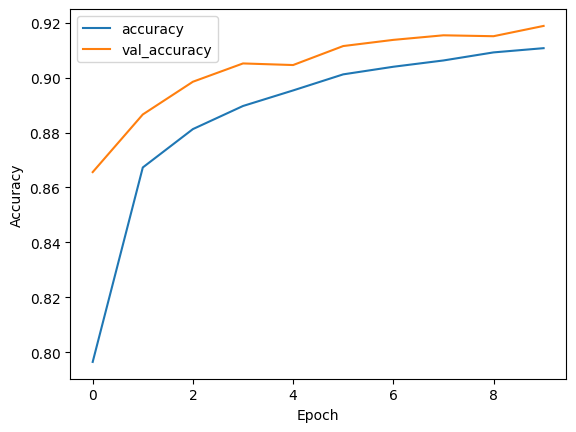

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
predicted_classes = fashion_model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
predicted_classes.shape, y_test.shape

313/313 [==============================] - 6s 20ms/step


((10000,), (10000,))

In [ ]:
from sklearn.metrics import classification_report

target_names=['Class {}'.format(1) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.76      0.86      0.81      1000
     Class 1       1.00      0.98      0.99      1000
     Class 1       0.88      0.87      0.87      1000
     Class 1       0.91      0.93      0.92      1000
     Class 1       0.87      0.84      0.86      1000
     Class 1       0.97      0.99      0.98      1000
     Class 1       0.78      0.70      0.74      1000
     Class 1       0.96      0.96      0.96      1000
     Class 1       0.99      0.98      0.98      1000
     Class 1       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

